In [1]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import numpy.matlib as M
from numpy.matlib import rand,zeros,ones,empty,eye
import matplotlib as mpl
from scipy import linalg
from scipy import misc
from sklearn import mixture
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import genfromtxt
from sklearn import mixture
from pylab import *
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

from itertools import cycle, islice
import pandas
np.random.seed(2)

In [2]:
# X has 20 original samples
X_orig = []
for i in range(20):
    Orig_data = np.genfromtxt('./20samples Original/Sample%s.csv' %(i+1), delimiter=',')
    #Orig_data = np.reshape(Orig_data,(1,201000))
    X_orig.append(Orig_data)
X_orig = np.array(X_orig)
Ex = np.genfromtxt('./20samples Original/Ex.csv', delimiter=',')
Em = np.genfromtxt('./20samples Original/Em.csv', delimiter=',')
Orig_labels = np.genfromtxt('./20labels Original/GCMS20samples.csv', delimiter=',')

In [3]:
def makspool(data, size_x, size_y, stride_x, stride_y):
    data_torch = torch.from_numpy(data)
    max_pooled = nn.MaxPool2d((size_x,size_y),stride=(stride_x, stride_y))
    output = max_pooled(data_torch)
    return output.numpy()

In [4]:
X_orig_downsampled = makspool(X_orig, 10,6,10,6)

In [5]:
idx = np.random.permutation(20)
X_train_down = X_orig_downsampled[idx[0:15]]
y_train = Orig_labels[idx[0:15]]
X_test_down = X_orig_downsampled[idx[15:]]
y_test = Orig_labels[idx[15:]]

In [6]:

X_train_new = []
y_train_new = []
for i in range(585):
    rand_im = np.random.randint(0,14,3)
    rand = np.random.uniform(0.133,0.533,3)
    new_image = np.zeros(np.shape(X_train_down[0]))
    new_label = np.zeros(np.shape(y_train[0]))
    for j in range(3):
        new_image = new_image + X_train_down[rand_im[j]] * rand[j]
        new_label = new_label + y_train[rand_im[j]] * rand[j]
    new_image = new_image + np.random.normal(0, 0.01, np.shape(new_image))
    X_train_new.append(new_image)
    y_train_new.append(new_label)
X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)

In [7]:
Ex = np.genfromtxt('./20samples Original/Ex.csv', dtype=float, delimiter=',')
Em = np.genfromtxt('./20samples Original/Em.csv', dtype=float, delimiter=',')
import pandas
df = pandas.read_csv('./20labels Original/PAHs.csv')
index_col='Acronyms'
leg = df[index_col][:16]
lst = list(leg)

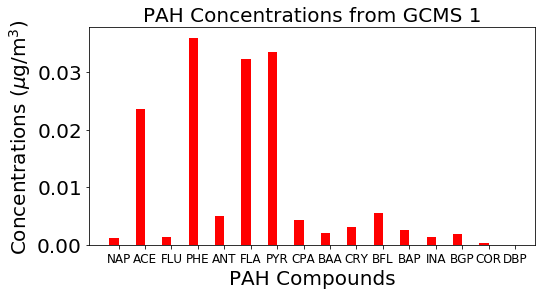

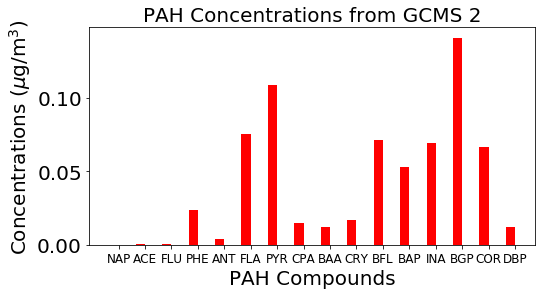

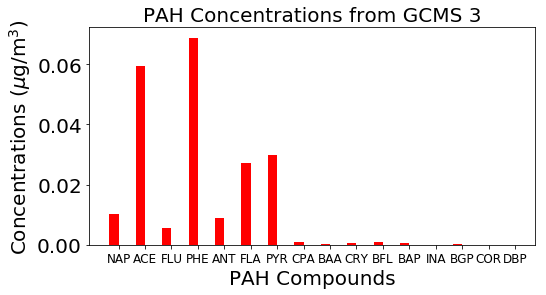

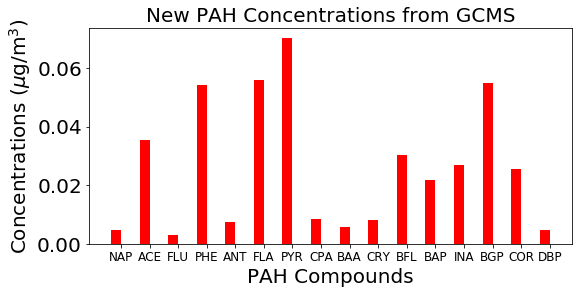

In [8]:

np.random.seed(20)
import matplotlib.ticker as ticker

def myfmt(x, pos):
    return '{0:.2f}'.format(x)

rand_im = np.random.randint(0,14,3)
rand = np.random.uniform(0.133,0.533,3)
    
fsize = 33
n = int(np.around(Ex.size/fsize))
Ex_new = zeros(fsize)
for i in range(fsize):
    Ex_new[i] = np.mean(Ex[i*n+1:(i+1)*n])
    
fsize = 100
n = int(np.around(Em.size/fsize))
Em_new = zeros(fsize)
for i in range(fsize):
    Em_new[i] = np.mean(Em[i*n+1:(i+1)*n])

from matplotlib import cm
mpl.rc('image', cmap='jet')


new_image = np.zeros(np.shape(X_train_down[0]))
new_label = np.zeros(np.shape(y_train[0]))
    

for i in range(3):
    f2 = plt.figure(figsize=(8,4))
    j=i
    new_image = new_image + X_train_down[rand_im[j]] * rand[j]
    new_label = new_label + y_train[rand_im[j]] * rand[j]
    new_image = new_image + np.random.normal(0, 0.01, np.shape(new_image))
    ax = f2.add_subplot(1,1,1)
    df2 = ax.bar(np.arange(16),y_train[rand_im[j]],0.35,color='red',label='Test Samples Original')
    ax.set_ylabel('Concentrations ($\mu$g/m$^{3}$)',fontsize=20)
    ax.set_xlabel('PAH Compounds',fontsize=20)
    ax.set_xticks(np.arange(16)+0.35*np.ones(16)/2)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xticklabels(lst)
    ax.set_title('PAH Concentrations from GCMS %s' %(i+1),fontsize=20)

f2 = plt.figure(figsize=(8,4))
ax = f2.add_subplot(1,1,1)
df1 = ax.bar(np.arange(16),new_label,0.35,color='red',label='Test Samples Original')
ax.set_ylabel('Concentrations ($\mu$g/m$^{3}$)',fontsize=20)
ax.set_xlabel('PAH Compounds',fontsize=20)
ax.set_xticks(np.arange(16)+0.35*np.ones(16)/2)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=20)
ax.set_xticklabels(lst)
ax.set_title('New PAH Concentrations from GCMS',fontsize=20)
   
plt.tight_layout(pad=0.4, w_pad=20, h_pad=5)
plt.show(f2)

In [9]:
rand

array([0.51391118, 0.38159556, 0.38914221])

In [10]:
X_train_down[1].shape

(100, 33)

In [11]:
X_test_new = []
y_test_new = []
for i in range(145):
    rand_im = np.random.randint(0,4,3)
    rand = np.random.uniform(0.1,0.3,3)
    new_image = np.zeros(np.shape(X_test_down[0]))
    new_label = np.zeros(np.shape(y_test[0]))
    for j in range(3):
        new_image = new_image + X_test_down[rand_im[j]] * rand[j]
        new_label = new_label + y_test[rand_im[j]] * rand[j]
    new_image = new_image + np.random.normal(0, 0.01, np.shape(new_image))
    X_test_new.append(new_image)
    y_test_new.append(new_label)
X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

In [12]:
X_train_new = np.append(X_train_new, X_train_down, axis=0)
X_test_new = np.append(X_test_new, X_test_down, axis=0)
y_train_new = np.append(y_train_new, y_train, axis=0)
y_test_new = np.append(y_test_new, y_test, axis=0)

In [13]:
X_train_reshape = [np.shape(X_train_new)[0], 1, np.shape(X_train_new)[1], np.shape(X_train_new)[2]]
X_test_reshape = [np.shape(X_test_new)[0], 1, np.shape(X_test_new)[1], np.shape(X_test_new)[2]]
X_train_new = X_train_new.reshape(X_train_reshape)
X_test_new = X_test_new.reshape(X_test_reshape)

In [14]:

print(np.shape(X_train_new))
print(np.shape(X_test_new))
print(np.shape(y_train_new))
print(np.shape(y_test_new))

(600, 1, 100, 33)
(150, 1, 100, 33)
(600, 16)
(150, 16)


In [15]:
np.savetxt("xtrain.csv", np.reshape(X_train_new, (600, 3300)), delimiter=',')
np.savetxt("xtest.csv", np.reshape(X_test_new, (150, 3300)), delimiter=',')
np.savetxt("ytrain.csv", y_train_new, delimiter=',')
np.savetxt("ytest.csv", y_test_new, delimiter=',')

In [16]:
class Net_OneLayer(nn.Module):
    def __init__(self):
        super(Net_OneLayer, self).__init__()
        self.fc1 = nn.Linear(3300,500)
        self.fc2 = nn.Linear(500, 16)

    def forward(self, x):
        x = x.view(-1, 3300)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x